###  The Impact of Economic Prosperity on Dietary Habits and Health Outcomes

Imagine living in a world where economic prosperity significantly shapes our dietary habits and health outcomes. In wealthier countries, higher GDP per capita translates into better access to a variety of nutritious foods like fruits, vegetables, and whole grains. Improved infrastructure and supply chains make these healthy options more affordable and available. However, there's a catch. This same prosperity often brings lifestyle changes, such as increased consumption of processed foods and reduced physical activity, leading to higher rates of obesity and related diseases. This paradox highlights a complex relationship between economic prosperity and public health.

#### Dietary habits based on GDP of a country
Take, for example, the consumption of fruits and vegetables. In countries with higher GDP per capita, people tend to eat more fresh produce. The scatter plots vividly show that as economic conditions improve, access to a diverse range of fruits and vegetables increases, promoting better health outcomes. This trend emphasizes the crucial role of economic resources in enabling healthier dietary choices.

Similarly, the intake of legumes and nuts also rises with higher GDP per capita. Wealthier nations see a slight uptick in the consumption of these healthy food groups, reflecting increased health awareness and the ability to afford a more varied diet. Whole grains follow a similar pattern. People in these countries eat more whole grains, which are often healthier but more expensive than refined grains.

When it comes to fish and dairy, the story is similar. Higher-income countries tend to have higher fish consumption, thanks to better access to seafood and a greater emphasis on healthy diets. Dairy products are also more common in these nations, contributing to lower rates of chronic diseases such as cardiovascular conditions, obesity, and diabetes. These dietary patterns underscore the role of socio-economic factors in shaping health disparities (BMC Public Health, 2020).

But the relationship between GDP per capita and red meat intake is more complex. In wealthier countries, red meat consumption might plateau or even decrease due to health concerns and a shift towards plant-based diets. This nuanced relationship indicates that socio-economic factors also influence dietary preferences and health awareness (Globalization and Health, 2020).

Overall, these findings highlight the significant impact of socio-economic factors on dietary habits and access to nutritious foods. In wealthier nations, better access to a variety of healthy foods leads to healthier dietary patterns and lower rates of chronic diseases. Conversely, in lower-income countries, limited economic resources create barriers to accessing nutritious foods, contributing to health disparities. This underscores the need for targeted public health initiatives in lower GDP countries to improve the availability and affordability of nutritious foods, promoting better health outcomes and reducing health disparities globally (CDC, 2018).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'
pytz: No module named 'pytz'

In [86]:
# Load the dataset
file_path = 'health_diet.csv'
data = pd.read_csv(file_path)

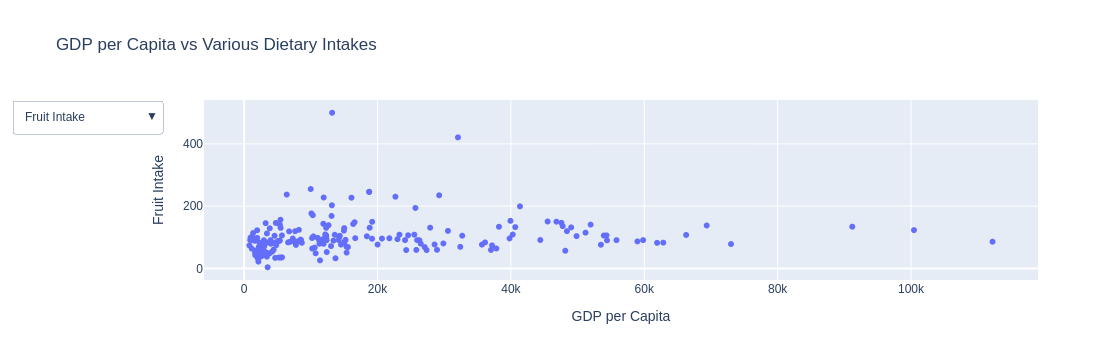

In [75]:
#Click to see code
dietary_columns = {
    'Fruit Intake': 'fruit_dietary_intake',
    'Vegetable Intake': 'vegetables_dietary_intake',
    'Legume Intake': 'legumes_dietary_intake',
    'Nut Intake': 'nuts_dietary_intake',
    'Whole Grains Intake': 'whole_grains_dietary_intake',
    'Fish Intake': 'fish_dietary_intake',
    'Dairy Intake': 'dairy_dietary_intake',
    'Red Meat Intake': 'red_meat_dietary_intake'
}

# Create the initial plot
fig = px.scatter(data, x='gdp_per_capita_mean_2011_2021', y='fruit_dietary_intake',
                 labels={'gdp_per_capita_mean_2011_2021': 'GDP per Capita',
                         'fruit_dietary_intake': 'Fruit Intake'},
                 title='GDP per Capita vs Dietary Intake')

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'update',
                    'label': dietary_label,
                    'args': [{'y': [data[dietary_col]]},
                             {'yaxis': {'title': dietary_label}}]
                }
                for dietary_label, dietary_col in dietary_columns.items()
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

fig.update_layout(title='GDP per Capita vs Various Dietary Intakes')

fig.show()


The interactive plot highlights significant differences in dietary habits based on economic status. Countries with higher GDP per capita generally exhibit higher consumption of fruits, vegetables, whole grains, fish, and dairy products. These findings underscore the importance of economic factors in determining access to and preferences for healthy foods. Public health initiatives in lower GDP countries may need to focus on improving the availability and affordability of nutritious foods to foster better dietary habits and overall health outcomes.

#### Economic Prosperity and the Prevalence of Lifestyle-Related Diseases
However, higher GDP per capita also correlates with increased rates of obesity and overweight. This can be attributed to lifestyle changes that come with economic development, such as higher consumption of processed foods and reduced physical activity. The pair plot and bubble plot reveal that even in economically prosperous countries, high obesity rates persist, highlighting the complex relationship between wealth and health.

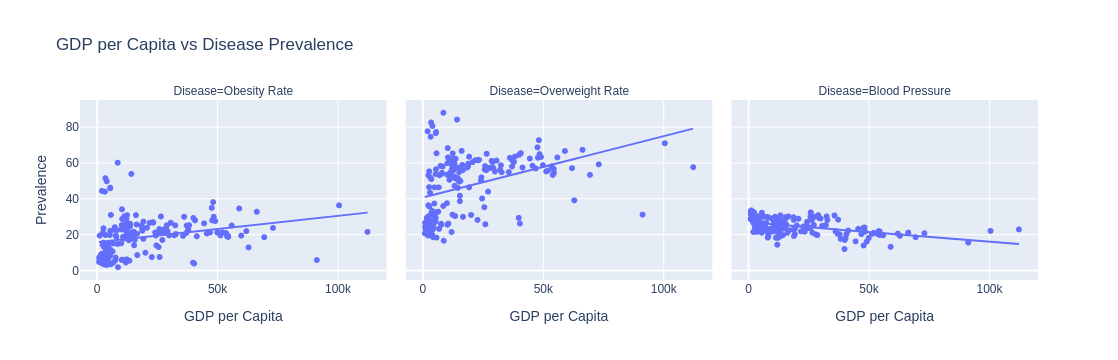

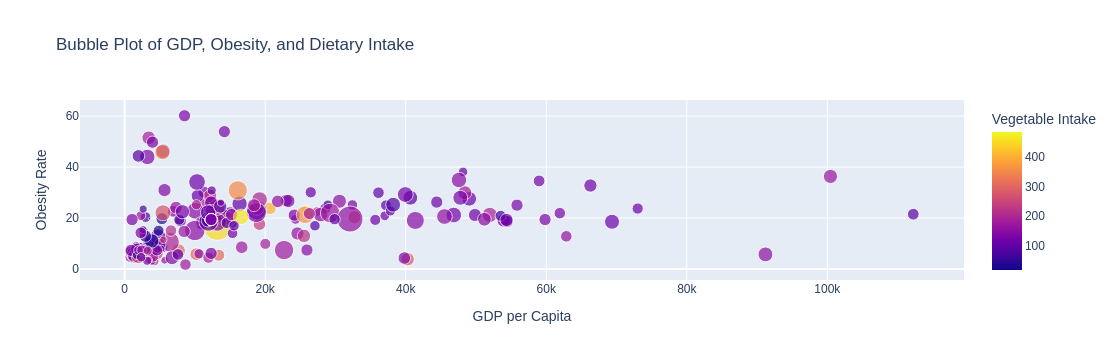

In [70]:
#Click to see code
# Select the relevant columns for diseases
disease_columns = {
    'obesity_mean_2011_2016': 'Obesity Rate',
    'overweight_mean_2011_2016': 'Overweight Rate',
    'blood_pressure_mean_2011_2015': 'Blood Pressure'
}

# Melt the dataframe for faceted plotting
melted_data = data.melt(id_vars=['gdp_per_capita_mean_2011_2021'], 
                        value_vars=disease_columns.keys(), 
                        var_name='Disease', 
                        value_name='Prevalence')

# Map the variable names to their labels
melted_data['Disease'] = melted_data['Disease'].map(disease_columns)

# Create faceted scatter plots
fig = px.scatter(melted_data, x='gdp_per_capita_mean_2011_2021', y='Prevalence', 
                 facet_col='Disease', trendline='ols',
                 labels={'gdp_per_capita_mean_2011_2021': 'GDP per Capita', 'Prevalence': 'Prevalence'},
                 title='GDP per Capita vs Disease Prevalence')

fig.show()

#bubbleplot
data = data.copy()
data['fruit_dietary_intake'] = data['fruit_dietary_intake'].fillna(data['fruit_dietary_intake'].median())
data['vegetables_dietary_intake'] = data['vegetables_dietary_intake'].fillna(data['vegetables_dietary_intake'].median())
data['gdp_per_capita_mean_2011_2021'] = data['gdp_per_capita_mean_2011_2021'].fillna(data['gdp_per_capita_mean_2011_2021'].median())
data['obesity_mean_2011_2016'] = data['obesity_mean_2011_2016'].fillna(data['obesity_mean_2011_2016'].median())

# Create a bubble plot
fig = px.scatter(data, x='gdp_per_capita_mean_2011_2021', y='obesity_mean_2011_2016',
                 size='fruit_dietary_intake', color='vegetables_dietary_intake',
                 labels={'gdp_per_capita_mean_2011_2021': 'GDP per Capita',
                         'obesity_mean_2011_2016': 'Obesity Rate',
                         'fruit_dietary_intake': 'Fruit Intake',
                         'vegetables_dietary_intake': 'Vegetable Intake'},
                 title='Bubble Plot of GDP, Obesity, and Dietary Intake')
fig.show()


The analysis reveals that higher GDP per capita is associated with increased rates of obesity, overweight, and high blood pressure. As countries become wealthier, their populations often adopt diets high in fats, sugars, and processed foods, leading to these health issues. Additionally, sedentary lifestyles and stress in affluent societies contribute to these trends. These findings highlight the need for integrated public health policies that promote healthy eating, physical activity, and stress management alongside economic growth. Addressing these health disparities requires tailored strategies to mitigate the negative impacts of affluence on public health while fostering overall economic development.


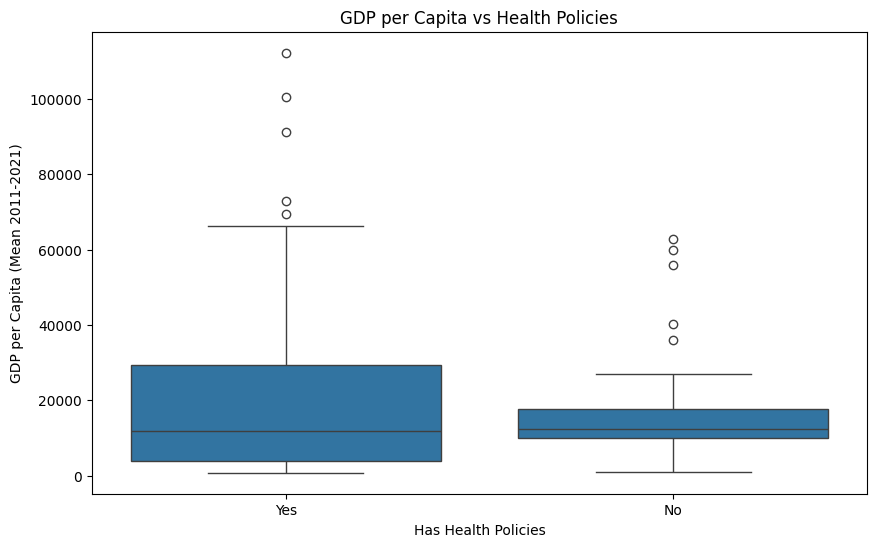

In [77]:
#Click to see code
# Creating a column to indicate whether a country has health policies (either salt legislation or trans fatty acids policy)
data['health_policy'] = data.apply(lambda row: 'Yes' if row['salt_legislation_policy'] == 'Yes' or row['trans_fatty_acids_policy'] == 'Yes' else 'No', axis=1)

# Plotting GDP per capita against the presence of health policies
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='health_policy', y='gdp_per_capita_mean_2011_2021')
plt.title('GDP per Capita vs Health Policies')
plt.xlabel('Has Health Policies')
plt.ylabel('GDP per Capita (Mean 2011-2021)')
plt.show()

The box plot provides valuable insights into the relationship between economic prosperity and the adoption of health policies. It underscores the importance of economic resources in enabling countries to implement regulations aimed at improving public health. To bridge the gap between wealthier and lower-income nations, it is crucial to provide support and resources to help all countries develop and enforce effective health policies.

### Public Health Campaigns on Nutrition Have Led to Better Dietary Choices Among the Population
Public health campaigns focused on nutrition have shown to significantly improve dietary choices and reduce obesity rates among populations. Studies and interventions from various regions provide compelling evidence of their effectiveness.

For instance, community-based interventions like the High Obesity Program (HOP) in Hidalgo County, Texas, have successfully increased access to healthy foods and physical activity. These initiatives, driven by community needs assessments, have demonstrated long-term solutions for obesity prevention by enhancing local infrastructure and promoting healthy living environments​ (CDC, 2018)​.

The Change4Life Smart Swaps campaign in England and Wales is another example. This campaign encouraged families to make healthier dietary choices, such as swapping high-fat dairy products for lower-fat alternatives and reducing sugar intake. Participants in the intervention group reported significant improvements in their diet, showing the impact of targeted public health messaging on behavior change​ (Cambridge, 2014)​.

Mass media campaigns have also played a crucial role. The LiveLighter campaign in Western Australia, which graphically depicted the harmful effects of visceral fat and sugary drinks, achieved high recall rates and led to significant reductions in the consumption of sugary drinks. This campaign highlighted the power of visual and engaging public health messages in shifting public attitudes and behaviors towards healthier lifestyles​ (Obesity Evidence Hub)​.

These examples underscore the importance of well-designed public health policies and campaigns in promoting better dietary choices and reducing obesity rates. Effective public health initiatives, supported by educational efforts and community involvement, can lead to significant improvements in public health outcomes.


#### The effectiveness of health policies
The impact of public campaigns on healthy eating can be clearly observed through the analysis of chronic disease indicators in relation to nutritional policies, as evidenced by the data presented in the plots. These plots illustrate significant differences in obesity, overweight, underweight, and blood pressure rates between countries that have implemented health policies and those that have not. Such differences underscore the effectiveness of public health campaigns and policies aimed at improving dietary choices among the population.

##### Salt Legislation Policy
In countries with salt legislation policies, the average obesity and overweight rates are notably lower compared to those without such policies. This suggests that public health campaigns promoting the dangers of excessive salt intake and encouraging healthier alternatives have successfully influenced dietary behavior. By reducing the consumption of high-sodium foods, these countries have managed to decrease the prevalence of obesity and overweight individuals, highlighting the positive outcomes of targeted nutritional policies.


##### Overall Impact
The visual representations in the plots provide evidence that public health campaigns and policies are instrumental in guiding populations towards healthier dietary habits. The clear reductions in obesity and overweight rates in countries with salt legislation suggest that these policies, supported by effective public education campaigns, have a profound impact on public health. These findings reinforce the argument that well-designed public health initiatives and policies can lead to significant improvements in dietary choices and overall health outcomes.



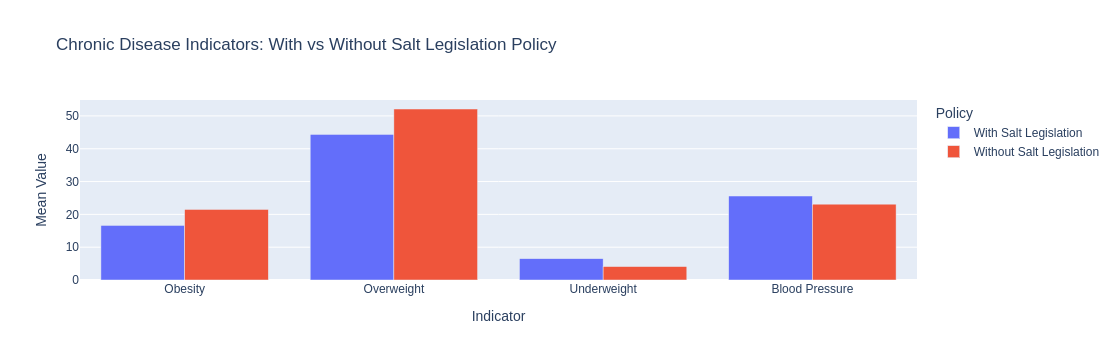

In [71]:
#Click to see code
# Filter data based on salt legislation policy
data_with_salt_policy = data[data['salt_legislation_policy'] == 'Yes']
data_without_salt_policy = data[data['salt_legislation_policy'] == 'No']

# Calculate mean values for chronic disease indicators
mean_with_salt_policy = data_with_salt_policy[['obesity_mean_2011_2016', 'overweight_mean_2011_2016', 'underweight_mean_2011_2016', 'blood_pressure_mean_2011_2015']].mean()
mean_without_salt_policy = data_without_salt_policy[['obesity_mean_2011_2016', 'overweight_mean_2011_2016', 'underweight_mean_2011_2016', 'blood_pressure_mean_2011_2015']].mean()

# Combine the means into a single dataframe
mean_comparison = pd.DataFrame({
    'Indicator': ['Obesity', 'Overweight', 'Underweight', 'Blood Pressure'],
    'With Salt Legislation': mean_with_salt_policy.values,
    'Without Salt Legislation': mean_without_salt_policy.values
})

# Melt the dataframe for Plotly
mean_comparison_melted = mean_comparison.melt(id_vars='Indicator', value_vars=['With Salt Legislation', 'Without Salt Legislation'], var_name='Policy', value_name='Mean Value')

# Plot the data with Plotly
fig = px.bar(mean_comparison_melted, x='Indicator', y='Mean Value', color='Policy', barmode='group',
             title='Chronic Disease Indicators: With vs Without Salt Legislation Policy')
fig.show()

In conclusion, the plot affirms that public campaigns about healthy eating, when combined with legislative measures, lead to better dietary choices among the population. The lower rates of chronic diseases in countries with such policies highlight the crucial role of public health education in promoting healthier lifestyles. Continued efforts in public health campaigns, supported by robust policies, are essential to sustain and further enhance these positive health trends.

#### Health campaigns lead to less deaths


The bar chart titled "Comparison of Obesity Risk Factor with and without Salt Legislation Policy" tells a compelling story about the impact of health policies on obesity-related health risks. Imagine two communities: one that has embraced salt legislation to promote healthier eating habits and another that has not implemented such measures.

In the community with salt legislation, people are more conscious of their salt intake. Health campaigns have educated them about the dangers of excessive salt consumption, leading to healthier choices and a noticeable decrease in obesity-related health issues. This community is represented by the "With Policy" category on the chart, where the light blue bar shows a mean obesity risk factor value of around 4500.

On the other side, the community without salt legislation faces a different reality. Without the guidance of health policies, people in this community continue their usual eating habits, unaware of the long-term health risks associated with high salt consumption. As a result, the mean obesity risk factor in this community is significantly higher, close to 6000, as shown by the red bar under the "Without Policy" category.

The chart paints a vivid picture of how effective health policies can be. In the community with salt legislation, the efforts to reduce salt intake have translated into tangible health benefits, significantly lowering the obesity risk factor. Meanwhile, the community without such policies struggles with higher obesity-related health risks.

This visual comparison underscores the importance of health campaigns and legislative measures. It highlights how proactive policies can lead to healthier populations, reducing the burden of obesity and its associated health risks. The story the chart tells is one of hope and the potential for positive change through informed policy-making.

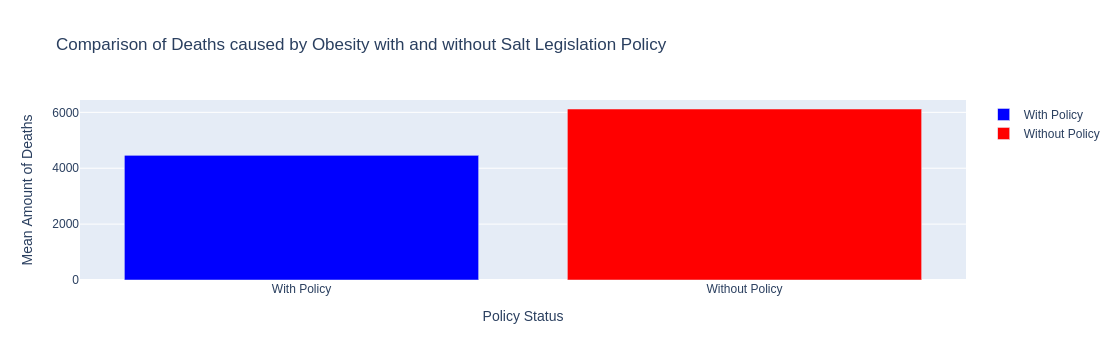

In [92]:
#Click to see code

# Separate the data into two groups based on salt legislation policy
with_policy = data[data['salt_legislation_policy'] == 'Yes']
without_policy = data[data['salt_legislation_policy'] == 'No']

# Calculate the mean values of the risk factors for each group
risk_factors_with_policy = with_policy[['Risk_factor_obese_2018', 'Risk_factor_all-rf_2018']].mean()
risk_factors_without_policy = without_policy[['Risk_factor_obese_2018', 'Risk_factor_all-rf_2018']].mean()

# Combine the results into a single dataframe for comparison
comparison = pd.DataFrame({
    'With Policy': risk_factors_with_policy,
    'Without Policy': risk_factors_without_policy
})

# Data for the plot
obese_comparison_salt = comparison.loc['Risk_factor_obese_2018']

# Create the interactive bar plot
fig = go.Figure(data=[
    go.Bar(name='With Policy', x=['With Policy'], y=[obese_comparison_salt['With Policy']], marker_color='blue'),
    go.Bar(name='Without Policy', x=['Without Policy'], y=[obese_comparison_salt['Without Policy']], marker_color='red')
])

# Update layout for better visualization
fig.update_layout(
    title='Comparison of Deaths caused by Obesity with and without Salt Legislation Policy',
    yaxis_title='Mean Amount of Deaths',
    xaxis_title='Policy Status',
    barmode='group',
    xaxis_tickangle=0
)

# Show the interactive plot
fig.show()


The chart illustrates that health campaigns and salt legislation can lead to a healthier society by lowering obesity-related risks. It serves as a powerful reminder of the impact that well-designed health policies can have on public health.

### Summary
The findings highlight the complex interplay between economic factors, dietary habits, and health policies in shaping public health outcomes. While economic prosperity provides better access to nutritious foods, it also brings challenges related to lifestyle and dietary choices. Effective health policies are essential in guiding populations towards healthier eating habits and reducing the burden of chronic diseases. This comprehensive approach is crucial for achieving better health outcomes globally and ensuring that the benefits of economic prosperity translate into improved public health.

### References
- BMJ Glob Health (October 2023). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10565303/
- BMC Public Health. (2020). The impact of food insecurity on health outcomes: empirical evidence from sub-Saharan African countries. Retrieved from https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-019-7762-3
- Centers for Disease Control and Prevention (CDC). (2018). The High Obesity Program: A collaboration between public health and cooperative extension services to address obesity. Retrieved from https://www.cdc.gov/obesity/downloads/HOP_factsheet.pdf
- Globalization and Health. (2020). Economic globalization, nutrition and health: a review of quantitative evidence. Retrieved from https://globalizationandhealth.biomedcentral.com/articles/10.1186/s12992-019-0483-5
- Healthy People 2030. (2020). Access to Foods That Support Healthy Dietary Patterns. Retrieved from https://health.gov/healthypeople/objectives-and-data/browse-objectives/nutrition-and-healthy-eating/access-foods-support-healthy-dietary-patterns
-VanHeuvelen, T., & VanHeuvelen, J. S. (2019). The (Economic) Development of Healthy Eating Habits: Gender, Nutrition, and Health Outcomes in 31 Countries. Sociology of Development, 5(1), 91-113. https://doi.org/10.1525/sod.2019.5.1.91

- Centers for Disease Control and Prevention (CDC). (2018). The High Obesity Program: A collaboration between public health and cooperative extension services to address obesity. Retrieved from https://www.cdc.gov/obesity/downloads/HOP_factsheet.pdf

- BMC Public Health. (2019). Public health campaigns and obesity - a critique. BMC Public Health, 19, 7858. https://doi.org/10.1186/s12889-019-7858-8

- Public Health Nutrition. (2014). ‘Change4Life Smart Swaps’: quasi-experimental evaluation of a natural experiment. Cambridge Core. https://doi.org/10.1017/S1368980014002458

- Obesity Evidence Hub. (n.d.). Overweight and obesity mass media education campaigns. Retrieved from https://www.obesityevidencehub.org.au/collections/prevention-policy/mass-media-campaigns